In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import os

# File Path
colab_path = '/content/drive/MyDrive/'
file_path = 'Econ150_Presentation'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir(colab_path + file_path)

Mounted at /content/drive


In [2]:
# Import Dataset
data = pd.read_csv('mlb_payrolls.csv')

# Create a variable: Win_Loss_Ratio
data['Win_Loss_Ratio'] = data['Wins'] / data['Losses']

# Clean 'Total Payroll Allocations' column to numerical format
data['Total_Payroll_Allocations_Clean'] = data['Total Payroll Allocations'].replace({r'[$,]': ''}, regex=True).astype(float)

# Print dataset for examination
data.head()

,Team,Team Name,Year,Average Age,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried,Wins,Losses,Postseason,Win_Loss_Ratio,Total_Payroll_Allocations_Clean
0,OAK,Oakland Athletics,2024,26.5,"$62,132,581","$28,956,713","$15,581,092","$15,557,073","$1,763,221",69,93,No Playoffs,0.741935,62132581.0
1,PIT,Pittsburgh Pirates,2024,27.7,"$84,050,989","$51,220,210","$14,524,211","$15,341,351","$2,965,217",76,86,No Playoffs,0.883721,84050989.0
2,TB,Tampa Bay Rays,2024,26.8,"$89,707,422","$37,691,876","$13,179,262","$34,675,167","$1,706,572",80,82,No Playoffs,0.975610,89707422.0
3,DET,Detroit Tigers,2024,26.0,"$96,961,614","$33,226,992","$26,677,166","$36,920,494","$1,070,295",86,76,Wildcard,1.131579,96961614.0
4,CLE,Cleveland Guardians,2024,26.3,"$105,224,582","$50,885,032","$21,120,833","$22,945,837","$10,272,880",92,69,Division Winner,1.333333,105224582.0


## Model 1 | Simple Linear Regression

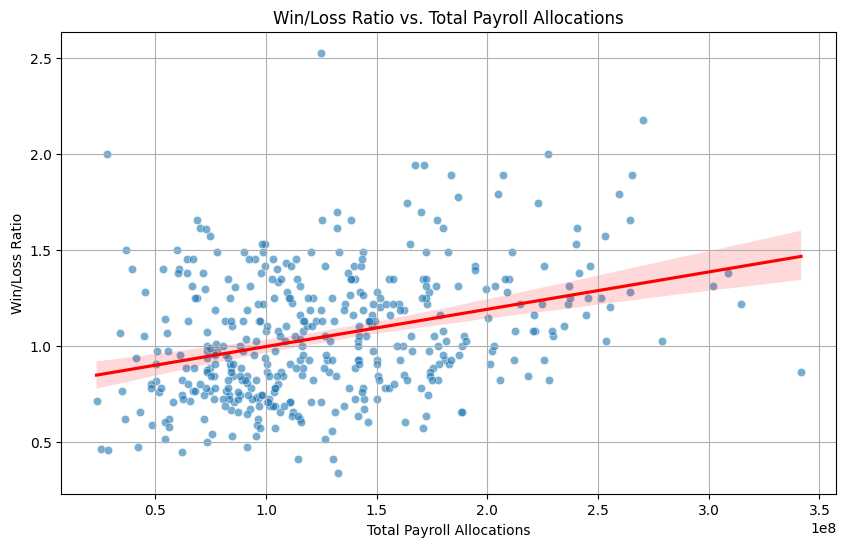

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Payroll_Allocations_Clean', y='Win_Loss_Ratio', data=data, alpha=0.6)
sns.regplot(x='Total_Payroll_Allocations_Clean', y='Win_Loss_Ratio', data=data, scatter=False, color='red')
plt.title('Win/Loss Ratio vs. Total Payroll Allocations')
plt.xlabel('Total Payroll Allocations')
plt.ylabel('Win/Loss Ratio')
plt.grid(True)
plt.show()

### Research Question and Interpretation of Scatterplot Visualization

Research Question:
We aim to see if there is a relationship between how much an mlb owner spends on a team and the teams success during the season.

The scatterplot shows a weak, positive trend between a teams total payroll and their win/loss ratio.

In [ ]:
# Simple Linear Regression Model
model = smf.ols('Win_Loss_Ratio ~ Total_Payroll_Allocations_Clean', data=data).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Win_Loss_Ratio   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     51.39
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           3.45e-12
Time:                        18:38:46   Log-Likelihood:                -108.30
No. Observations:                 420   AIC:                             220.6
Df Residuals:                     418   BIC:                             228.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Linear Regression Model Interpretation

The coefficient for Total_Payroll_Allocations is approximately 1.946e-09. This implies that for each additional dollar invested in team payroll, the Win/Loss Ratio is predicted to increase by a minute amount. Crucially, the associated p-value of 0.000 (well below 0.05) confirms this relationship is statistically significant, meaning it's unlikely to be a random occurrence. However, the model's R-squared value is 0.109. This indicates that total payroll allocations account for only about 10.9% of the variance observed in a team's Win/Loss Ratio, with the vast majority (89.1%) attributable to other unmodeled factors. The F-statistic (51.39) and its tiny p-value (3.45e-12) affirm the overall statistical significance of the model. In essence, while increased spending does correlate positively and significantly with team success, it's one factor among many influencing performance.



#Inflation adjusted Total Payroll vs Win/Loss

In [ ]:
base_year = 2024
inflation_rate = 0.025

data['inflation_multiplier'] = (1 + inflation_rate) ** (base_year - data['Year'])
data['Total_Payroll_Allocations_Adjusted'] = data['Total_Payroll_Allocations_Clean'] * data['inflation_multiplier']

print("DataFrame with inflation-adjusted payroll:")
data.head()

DataFrame with inflation-adjusted payroll:


,Team,Team Name,Year,Average Age,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried,Wins,Losses,Postseason,Win_Loss_Ratio,Total_Payroll_Allocations_Clean,Injured_Clean,inflation_multiplier,Total_Payroll_Allocations_Adjusted
0,OAK,Oakland Athletics,2024,26.5,"$62,132,581","$28,956,713","$15,581,092","$15,557,073","$1,763,221",69,93,No Playoffs,0.741935,62132581.0,15581092.0,1.0,62132581.0
1,PIT,Pittsburgh Pirates,2024,27.7,"$84,050,989","$51,220,210","$14,524,211","$15,341,351","$2,965,217",76,86,No Playoffs,0.883721,84050989.0,14524211.0,1.0,84050989.0
2,TB,Tampa Bay Rays,2024,26.8,"$89,707,422","$37,691,876","$13,179,262","$34,675,167","$1,706,572",80,82,No Playoffs,0.975610,89707422.0,13179262.0,1.0,89707422.0
3,DET,Detroit Tigers,2024,26.0,"$96,961,614","$33,226,992","$26,677,166","$36,920,494","$1,070,295",86,76,Wildcard,1.131579,96961614.0,26677166.0,1.0,96961614.0
4,CLE,Cleveland Guardians,2024,26.3,"$105,224,582","$50,885,032","$21,120,833","$22,945,837","$10,272,880",92,69,Division Winner,1.333333,105224582.0,21120833.0,1.0,105224582.0


In [ ]:
import statsmodels.formula.api as smf
model_adjusted_payroll = smf.ols('Win_Loss_Ratio ~ Total_Payroll_Allocations_Adjusted', data=data).fit()

print(model_adjusted_payroll.summary())

                            OLS Regression Results                            
Dep. Variable:         Win_Loss_Ratio   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     54.18
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           9.79e-13
Time:                        19:44:00   Log-Likelihood:                -107.06
No. Observations:                 420   AIC:                             218.1
Df Residuals:                     418   BIC:                             226.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Summary Adjusted Total Payroll vs Win/Loss:

### Q&A
1.  **What is the relationship between 'Win\_Loss\_Ratio' and the inflation-adjusted payroll?**
    A linear regression model shows a statistically significant, positive but weak relationship between 'Win\_Loss\_Ratio' and 'Total\_Payroll\_Allocations\_Adjusted'. For every one dollar increase in inflation-adjusted payroll, the win/loss ratio is estimated to increase by approximately 1.802e-09, holding other factors constant.

2.  **How well does the inflation-adjusted payroll explain the variation in 'Win\_Loss\_Ratio'?**
    The inflation-adjusted payroll explains approximately 11.5% of the variance in 'Win\_Loss\_Ratio' (R-squared = 0.115).

### Data Analysis Key Findings
*   'Total Payroll Allocations' was successfully adjusted for inflation to a 2024 base year using a 2.5% annual inflation rate, creating a new column `Total_Payroll_Allocations_Adjusted`.
*   A scatterplot visually confirmed a generally positive trend between the inflation-adjusted payroll and the win/loss ratio, with a fitted regression line.
*   A simple linear regression model with `Win_Loss_Ratio` as the dependent variable and `Total_Payroll_Allocations_Adjusted` as the independent variable yielded an R-squared of 0.115.
*   The model was statistically significant (F-statistic = 54.18, p-value = 9.79e-13).
*   The coefficient for `Total_Payroll_Allocations_Adjusted` was 1.802e-09, which is positive and statistically significant (p-value = 0.000).
*   The model summary indicated a large condition number (4.18e+08), suggesting potential numerical issues or multicollinearity, although only one independent variable was used here.

### Insights or Next Steps
*   While statistically significant, the low R-squared value of 0.115 indicates that inflation-adjusted payroll alone is a relatively weak predictor of the win/loss ratio. Other factors likely play a more substantial role.
*   The large condition number should be investigated. Although a single predictor model usually doesn't suffer from multicollinearity, it could point to scaling issues of the independent variable or numerical precision concerns, which may warrant re-examining the variable's units or scale.


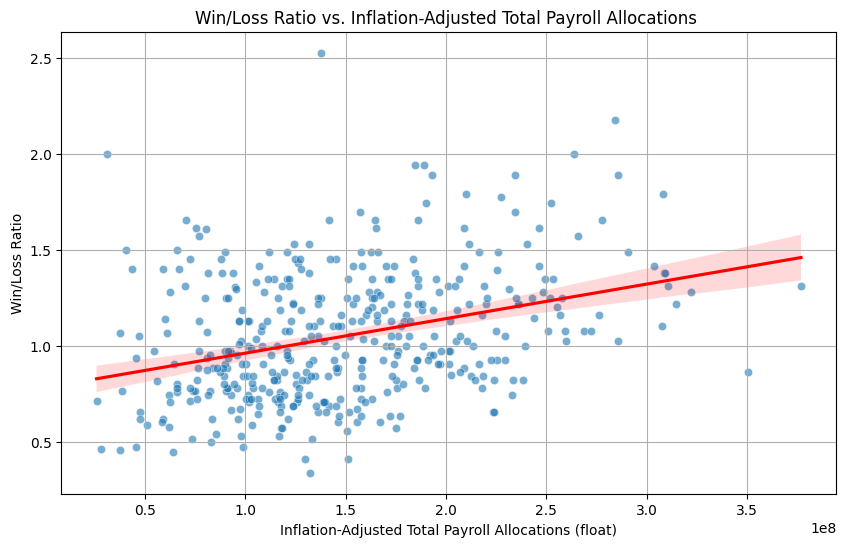

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Payroll_Allocations_Adjusted', y='Win_Loss_Ratio', data=data, alpha=0.6)
sns.regplot(x='Total_Payroll_Allocations_Adjusted', y='Win_Loss_Ratio', data=data, scatter=False, color='red')
plt.title('Win/Loss Ratio vs. Inflation-Adjusted Total Payroll Allocations ')
plt.xlabel('Inflation-Adjusted Total Payroll Allocations (float)')
plt.ylabel('Win/Loss Ratio')
plt.grid(True)
plt.show()

# Model 2 | Simple Linear Regression with Active 26-Man Roster Ratio

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Construct the full file path
full_csv_path = colab_path + file_path + '/' + 'mlb_payrolls.csv'

# Re-load the dataset if it's not already in memory
if 'data' not in locals():
    # Use the full_csv_path to read the CSV
    data = pd.read_csv(full_csv_path)

# Create a variable: Win_Loss_Ratio (if not already created)
if 'Win_Loss_Ratio' not in data.columns:
    data['Win_Loss_Ratio'] = data['Wins'] / data['Losses']

# Clean 'Total Payroll Allocations' column to numerical format (if not already cleaned)
if 'Total_Payroll_Allocations_Clean' not in data.columns:
    data['Total_Payroll_Allocations_Clean'] = data['Total Payroll Allocations'].replace({r'[$,]': ''}, regex=True).astype(float)

# Clean 'Active 26-Man' column to numerical format
data['Active_26_Man_Clean'] = data['Active 26-Man'].replace({r'[$,]': ''}, regex=True).astype(float)

# Create a new variable: Ratio of Active 26-Man to Total Payroll
data['Active_26_Man_Ratio'] = data['Active_26_Man_Clean'] / data['Total_Payroll_Allocations_Clean']

# Display the first few rows with the new column
display(data.head())

,Team,Team Name,Year,Average Age,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried,Wins,Losses,Postseason,Win_Loss_Ratio,Total_Payroll_Allocations_Clean,Active_26_Man_Clean,Active_26_Man_Ratio
0,OAK,Oakland Athletics,2024,26.5,"$62,132,581","$28,956,713","$15,581,092","$15,557,073","$1,763,221",69,93,No Playoffs,0.741935,62132581.0,28956713.0,0.466047
1,PIT,Pittsburgh Pirates,2024,27.7,"$84,050,989","$51,220,210","$14,524,211","$15,341,351","$2,965,217",76,86,No Playoffs,0.883721,84050989.0,51220210.0,0.609394
2,TB,Tampa Bay Rays,2024,26.8,"$89,707,422","$37,691,876","$13,179,262","$34,675,167","$1,706,572",80,82,No Playoffs,0.975610,89707422.0,37691876.0,0.420165
3,DET,Detroit Tigers,2024,26.0,"$96,961,614","$33,226,992","$26,677,166","$36,920,494","$1,070,295",86,76,Wildcard,1.131579,96961614.0,33226992.0,0.342682
4,CLE,Cleveland Guardians,2024,26.3,"$105,224,582","$50,885,032","$21,120,833","$22,945,837","$10,272,880",92,69,Division Winner,1.333333,105224582.0,50885032.0,0.483585


In [ ]:
# Simple Linear Regression Model
model_active_ratio = smf.ols('Win_Loss_Ratio ~ Active_26_Man_Ratio', data=data).fit()

# Print the model summary
print(model_active_ratio.summary())

                            OLS Regression Results                            
Dep. Variable:         Win_Loss_Ratio   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     95.50
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           1.88e-20
Time:                        19:15:16   Log-Likelihood:                -89.444
No. Observations:                 420   AIC:                             182.9
Df Residuals:                     418   BIC:                             191.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5033    

### Scatterplot: Win/Loss Ratio vs. Active Roster Payroll Ratio

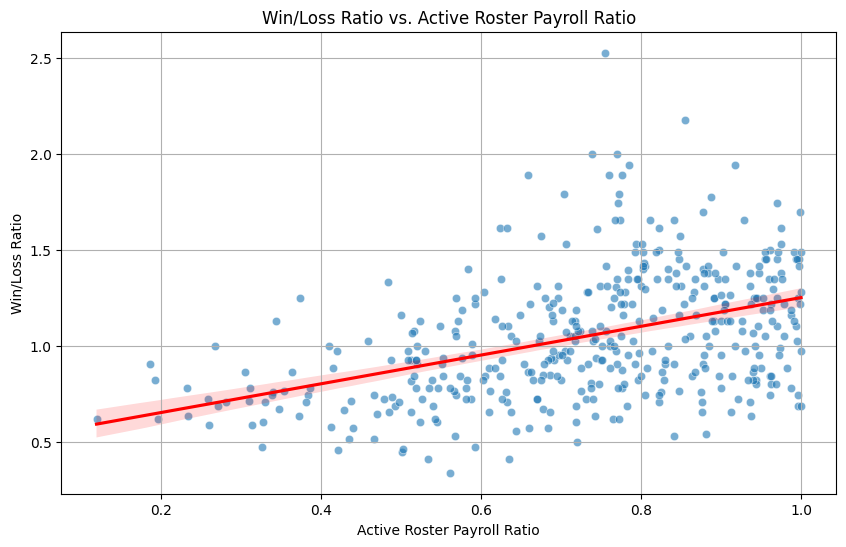

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Active_26_Man_Ratio', y='Win_Loss_Ratio', data=data, alpha=0.6)
sns.regplot(x='Active_26_Man_Ratio', y='Win_Loss_Ratio', data=data, scatter=False, color='red')
plt.title('Win/Loss Ratio vs. Active Roster Payroll Ratio')
plt.xlabel('Active Roster Payroll Ratio')
plt.ylabel('Win/Loss Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Simple Linear Regression Model with Active_26_Man_Clean
model_active_clean = smf.ols('Win_Loss_Ratio ~ Active_26_Man_Clean', data=data).fit()

# Print the model summary
print(model_active_clean.summary())

                            OLS Regression Results                            
Dep. Variable:         Win_Loss_Ratio   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     131.7
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           1.11e-26
Time:                        19:28:22   Log-Likelihood:                -75.154
No. Observations:                 420   AIC:                             154.3
Df Residuals:                     418   BIC:                             162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7362    

### Scatterplot: Win/Loss Ratio vs. Active Roster Payroll (Amount)

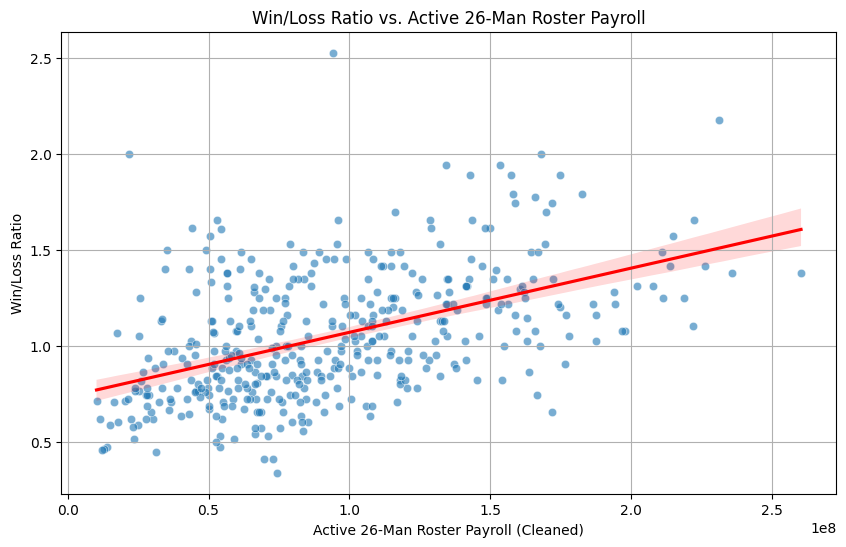

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Active_26_Man_Clean', y='Win_Loss_Ratio', data=data, alpha=0.6)
sns.regplot(x='Active_26_Man_Clean', y='Win_Loss_Ratio', data=data, scatter=False, color='red')
plt.title('Win/Loss Ratio vs. Active 26-Man Roster Payroll')
plt.xlabel('Active 26-Man Roster Payroll (Cleaned)')
plt.ylabel('Win/Loss Ratio')
plt.grid(True)
plt.show()

## Adjust Active 26-Man Payroll for Inflation



In [5]:
base_year = 2024
inflation_rate = 0.025
data['inflation_multiplier'] = (1 + inflation_rate) ** (base_year - data['Year'])

if 'Active_26_Man_Clean' not in data.columns:
    data['Active_26_Man_Clean'] = data['Active 26-Man'].replace({r'[$,]': ''}, regex=True).astype(float)

data['Active_26_Man_Adjusted'] = data['Active_26_Man_Clean'] * data['inflation_multiplier']

print("DataFrame with inflation-adjusted active 26-man payroll:")
data.head()

DataFrame with inflation-adjusted active 26-man payroll:


,Team,Team Name,Year,Average Age,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried,Wins,Losses,Postseason,Win_Loss_Ratio,Total_Payroll_Allocations_Clean,Active_26_Man_Clean,inflation_multiplier,Active_26_Man_Adjusted
0,OAK,Oakland Athletics,2024,26.5,"$62,132,581","$28,956,713","$15,581,092","$15,557,073","$1,763,221",69,93,No Playoffs,0.741935,62132581.0,28956713.0,1.0,28956713.0
1,PIT,Pittsburgh Pirates,2024,27.7,"$84,050,989","$51,220,210","$14,524,211","$15,341,351","$2,965,217",76,86,No Playoffs,0.883721,84050989.0,51220210.0,1.0,51220210.0
2,TB,Tampa Bay Rays,2024,26.8,"$89,707,422","$37,691,876","$13,179,262","$34,675,167","$1,706,572",80,82,No Playoffs,0.975610,89707422.0,37691876.0,1.0,37691876.0
3,DET,Detroit Tigers,2024,26.0,"$96,961,614","$33,226,992","$26,677,166","$36,920,494","$1,070,295",86,76,Wildcard,1.131579,96961614.0,33226992.0,1.0,33226992.0
4,CLE,Cleveland Guardians,2024,26.3,"$105,224,582","$50,885,032","$21,120,833","$22,945,837","$10,272,880",92,69,Division Winner,1.333333,105224582.0,50885032.0,1.0,50885032.0


## Linear Regression with Inflation-Adjusted Active Payroll



In [6]:
import statsmodels.formula.api as smf

# Simple Linear Regression Model with Active_26_Man_Adjusted
model_active_adjusted = smf.ols('Win_Loss_Ratio ~ Active_26_Man_Adjusted', data=data).fit()

# Print the model summary
print(model_active_adjusted.summary())

                            OLS Regression Results                            
Dep. Variable:         Win_Loss_Ratio   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           2.70e-24
Time:                        05:50:48   Log-Likelihood:                -80.631
No. Observations:                 420   AIC:                             165.3
Df Residuals:                     418   BIC:                             173.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

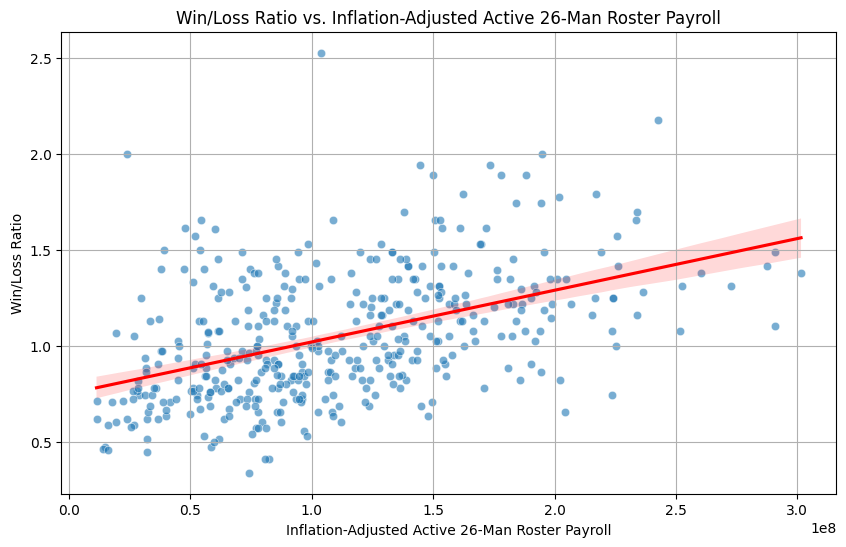

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Active_26_Man_Adjusted', y='Win_Loss_Ratio', data=data, alpha=0.6)
sns.regplot(x='Active_26_Man_Adjusted', y='Win_Loss_Ratio', data=data, scatter=False, color='red')
plt.title('Win/Loss Ratio vs. Inflation-Adjusted Active 26-Man Roster Payroll')
plt.xlabel('Inflation-Adjusted Active 26-Man Roster Payroll')
plt.ylabel('Win/Loss Ratio')
plt.grid(True)
plt.show()